# Analysis of Yelp Business Intelligence Data 

We will analyze a subset of Yelp's business, reviews and user data. This dataset comes to us from [Kaggle](https://www.kaggle.com/yelp-dataset/yelp-dataset) although we have taken steps to pull this data into a publis s3 bucket: `s3://sta9760-spark-datasets-danny/yelp-dataset/*.json`


# Installation and Initial Setup

Begin by installing the necessary libraries that you may need to conduct your analysis. At the very least, you must install `pandas` and `matplotlib`


In [31]:
sc.install_pypi_package( "IPython" )

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Created wheel for backcall: filename=backcall-0.1.0-py3-none-any.whl size=10413 sha256=85b7bbcccc3e74f42d153dcec930fc99fdfc2aea5e4a940a33a062918eae6fbe
  Stored in directory: /mnt/var/lib/livy/.cache/pip/wheels/b4/cb/f1/d142b3bb45d488612cf3943d8a1db090eb95e6687045ba61d1
Successfully built backcall

In [1]:
sc.install_pypi_package( "matplotlib==3.2.1" )
sc.install_pypi_package( "pandas==1.0.3" )
sc.install_pypi_package( "seaborn==0.10.0" )


VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1587955097860_0001,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Importing

Now, import the installed packages from the previous block below.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
%matplotlib inline

In [4]:
%%info

ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1587955097860_0001,pyspark,idle,Link,Link,✔


In [5]:
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
beautifulsoup4             4.8.1  
boto                       2.49.0 
cycler                     0.10.0 
jmespath                   0.9.4  
kiwisolver                 1.2.0  
lxml                       4.4.2  
matplotlib                 3.2.1  
mysqlclient                1.4.6  
nltk                       3.4.5  
nose                       1.3.4  
numpy                      1.14.5 
pandas                     1.0.3  
pip                        20.0.2 
py-dateutil                2.2    
pyparsing                  2.4.7  
python-dateutil            2.8.1  
python36-sagemaker-pyspark 1.2.6  
pytz                       2019.3 
PyYAML                     3.11   
scipy                      1.4.1  
seaborn                    0.10.0 
setuptools                 46.1.3 
six                        1.13.0 
soupsieve                  1.9.5  
wheel                      0.34.2 
windmill                   1.6

## Loading Data

We are finally ready to load data. Using `spark` load the data from S3 into a `dataframe` object that we can manipulate further down in our analysis.

In [5]:
business_data  = spark.read.json( 's3://sta9760-spark-datasets-danny/yelp-dataset/*business.json' )

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [119]:
type(business_data)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<class 'pyspark.sql.dataframe.DataFrame'>

## Overview of Data
Display the number of rows and columns in our dataset.

In [6]:
# Total columns
print( f'Total Columns: {len(business_data.columns)}' )
print(f'Total Rows: {business_data.count():,}')


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 14
Total Rows: 209,393

Display the DataFrame schema below.

In [121]:
business_data.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

Display the first 5 rows with the following columns:

* `business_id`
* `name`
* `city`
* `state`
* `categories`

In [122]:
business_data.select(['business_id','name','city','state','categories']).show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+---------------+-----+--------------------+
|         business_id|                name|           city|state|          categories|
+--------------------+--------------------+---------------+-----+--------------------+
|f9NumwFMBDn751xgF...|The Range At Lake...|      Cornelius|   NC|Active Life, Gun/...|
|Yzvjg0SayhoZgCljU...|   Carlos Santo, NMD|     Scottsdale|   AZ|Health & Medical,...|
|XNoUzKckATkOD1hP6...|             Felinus|       Montreal|   QC|Pets, Pet Service...|
|6OAZjbxqM5ol29BuH...|Nevada House of Hose|North Las Vegas|   NV|Hardware Stores, ...|
|51M2Kk903DFYI6gnB...|USE MY GUY SERVIC...|           Mesa|   AZ|Home Services, Pl...|
+--------------------+--------------------+---------------+-----+--------------------+
only showing top 5 rows

# Analyzing Categories

Let's now answer this question: **how many unique categories are represented in this dataset?**

Essentially, we have the categories per business as a list - this is useful to quickly see what each business might be represented as but it is difficult to easily answer questions such as:

* How many businesses are categorized as `Active Life`, for instance
* What are the top 20 most popular categories available?

## Association Table

We need to "break out" these categories from the business ids? One common approach to take is to build an association table mapping a single business id multiple times to each distinct category.

For instance, given the following:


| business_id | categories |
|-------------|------------|
| abcd123     | a,b,c      |

We would like to derive something like:

| business_id | category |
|-------------|------------|
| abcd123     | a          |
| abcd123     | b          |
| abcd123     | c          |


What this does is allow us to then perform a myriad of rollups and other analysis on this association table which can aid us in answering the questions asked above.

Implement the code necessary to derive the table described from your original yelp dataframe.

In [123]:
## just to see the structure of the column categories
business_data.select('categories').show(10)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+
|          categories|
+--------------------+
|Active Life, Gun/...|
|Health & Medical,...|
|Pets, Pet Service...|
|Hardware Stores, ...|
|Home Services, Pl...|
|Auto Repair, Auto...|
|Dry Cleaning & La...|
|Auto Repair, Oil ...|
|Ethnic Food, Food...|
|Martial Arts, Gym...|
+--------------------+
only showing top 10 rows

Display the first 5 rows of your association table below.

In [135]:
from pyspark.sql.functions import split, explode

tab_association = business_data.select(business_data.business_id, explode(split(business_data.categories, ', '))\
                                       .alias('category'))

tab_association.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------------+
|         business_id|        category|
+--------------------+----------------+
|f9NumwFMBDn751xgF...|     Active Life|
|f9NumwFMBDn751xgF...|Gun/Rifle Ranges|
|f9NumwFMBDn751xgF...|     Guns & Ammo|
|f9NumwFMBDn751xgF...|        Shopping|
|Yzvjg0SayhoZgCljU...|Health & Medical|
+--------------------+----------------+
only showing top 5 rows

## Total Unique Categories

Finally, we are ready to answer the question: **what is the total number of unique categories available?**

Below, implement the code necessary to calculate this figure.



In [136]:
tab_association.select('category').distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1336

#### There 1336 different categories for type of bussiness.

## Top Categories By Business

Now let's find the top categories in this dataset by rolling up categories.

### Counts of Businesses / Category

So now, let's unroll our distinct count a bit and display the per count value of businesses per category.

The expected output should be:

| category | count |
|-------------|------------|
| a     | 15         |
| b     | 2          |
| c     | 45          |

Or something to that effect.


In [137]:
tab_association.groupby('category').count().show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-----+
|           category|count|
+-------------------+-----+
|     Paddleboarding|   36|
|     Dermatologists|  341|
|   Historical Tours|   54|
|   Hot Air Balloons|   21|
|Mobile Home Dealers|   16|
|      Data Recovery|  195|
|      Videographers|  169|
|      Skating Rinks|  104|
|             Fondue|   54|
|    Pet Photography|   49|
|  Pet Waste Removal|   34|
|        Boat Repair|  100|
|            Beaches|   74|
|       Contract Law|   13|
|       Aerial Tours|   28|
|  Signature Cuisine|    1|
|        Hobby Shops|  828|
|           Day Spas| 2880|
|              Reiki|  312|
|           Honduran|    8|
+-------------------+-----+
only showing top 20 rows

### Bar Chart of Top Categories

With this data available, let us now build a barchart of the top 20 categories. 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```


In [138]:
temp = tab_association.groupby('category')\
                    .count()\
                    .orderBy(['count'], ascending = False)
temp.show(5)                    


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------+-----+
|     category|count|
+-------------+-----+
|  Restaurants|63944|
|     Shopping|34644|
|         Food|32991|
|Home Services|22487|
|Beauty & Spas|20520|
+-------------+-----+
only showing top 5 rows

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

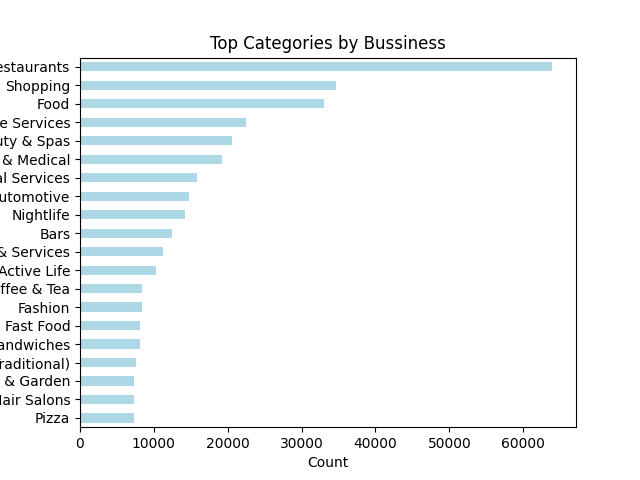

In [139]:
temp.toPandas()\
    .head(20)\
    .sort_values(ascending = True, by='count')\
    .plot.barh(y = 'count', 
               x = 'category', 
               rot=0, 
               title = 'Top Categories by Bussiness', 
               legend = False,
               color = 'lightblue')\
    .set(xlabel="Count", ylabel = 'Category')


%matplot plt

# Do Yelp Reviews Skew Negative?

Oftentimes, it is said that the only people who write a written review are those who are extremely _dissatisfied_ or extremely _satisfied_ with the service received. 

How true is this really? Let's try and answer this question.


## Loading User Data ( the review data set)

Begin by loading **the user data set** from S3 and printing schema to determine what data is available.


In [63]:
review_data  = spark.read.json( 's3://sta9760-spark-datasets-danny/yelp-dataset/*review.json' )
user_data  = spark.read.json( 's3://sta9760-spark-datasets-danny/yelp-dataset/*user.json' )

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [101]:
review_data.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

Let's begin by listing the `business_id` and `stars` columns together for the user reviews data.

In [102]:
review_data.select(['business_id','stars']).show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|-MhfebM0QIsKt87iD...|  2.0|
|lbrU8StCq3yDfr-QM...|  1.0|
|HQl28KMwrEKHqhFrr...|  5.0|
|5JxlZaqCnk1MnbgRi...|  1.0|
|IS4cv902ykd8wj1TR...|  4.0|
+--------------------+-----+
only showing top 5 rows

Now, let's aggregate along the `stars` column to get a resultant dataframe that displays _average stars_ per business as accumulated by users who **took the time to submit a written review**.

In [9]:
from pyspark.sql.functions import avg

review_agg = review_data.filter(review_data.text.isNotNull())\
            .groupby(review_data.business_id)\
            .agg(avg(review_data.stars))

review_agg.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|        avg(stars)|
+--------------------+------------------+
|ATeOjZzE3VOI-RW7F...| 3.433734939759036|
|RMjCnixEY5i12Ciqn...|3.5316455696202533|
|vbUABNAQI2iwN7v0x...|2.4545454545454546|
|VHsNB3pdGVcRgs6C3...| 3.411764705882353|
|r-W1HPIZ3V6S2DaXh...| 4.852459016393443|
+--------------------+------------------+
only showing top 5 rows

#### Joining two dataframes 

Now the fun part - let's join our two dataframes (reviews and business data) by `business_id`. 

In [10]:
business_data.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['address', 'attributes', 'business_id', 'categories', 'city', 'hours', 'is_open', 'latitude', 'longitude', 'name', 'postal_code', 'review_count', 'stars', 'state']

In [11]:
joined_data = business_data\
                .join(review_agg, on=['business_id'], how='inner')
joined_data.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['business_id', 'address', 'attributes', 'categories', 'city', 'hours', 'is_open', 'latitude', 'longitude', 'name', 'postal_code', 'review_count', 'stars', 'state', 'avg(stars)']

Let's see a few of these:

In [12]:
joined_data.select(['avg(stars)','stars','name','city', 'state'])\
            .orderBy('stars', ascending = False)\
            .show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+-----+--------------------+----------+-----+
|       avg(stars)|stars|                name|      city|state|
+-----------------+-----+--------------------+----------+-----+
|4.809523809523809|  5.0|Rob's Dog Trainin...|   Phoenix|   AZ|
|           4.9375|  5.0|             PostNet| Henderson|   NV|
|              5.0|  5.0|     Polished Dental|Pittsburgh|   PA|
|4.888888888888889|  5.0|Toronto Animal Se...|   Toronto|   ON|
|            4.875|  5.0|TD Visa Infinite ...|   Toronto|   ON|
+-----------------+-----+--------------------+----------+-----+
only showing top 5 rows

### 'Skew' Calculation

Compute a new dataframe that calculates what we will call the _skew_ (for lack of a better word) between the avg stars accumulated from written reviews and the _actual_ star rating of a business (ie: the average of stars given by reviewers who wrote an actual review **and** reviewers who just provided a star rating).

The formula you can use is something like:

```
(row['avg(stars)'] - row['stars']) / row['stars']
```

If the **skew** is negative, we can interpret that to be: reviewers who left a written response were more dissatisfied than normal. If **skew** is positive, we can interpret that to be: reviewers who left a written response were more satisfied than normal.

In [13]:
skew_data = joined_data.withColumn('skew',((joined_data['avg(stars)'] - joined_data['stars']) / joined_data['stars']))\
            .select(['name','skew'])
skew_data.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|                name|                skew|
+--------------------+--------------------+
|     Dublin O'Neil's|-0.02521008403361...|
|     Four Star Sushi|0.009041591320072382|
|Los Vietnamita Ta...|-0.01010101010101019|
|   Rockland Trailers|                 0.0|
|       Allen Hui, OD|-0.02950819672131...|
+--------------------+--------------------+
only showing top 5 rows

And finally, graph it!

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

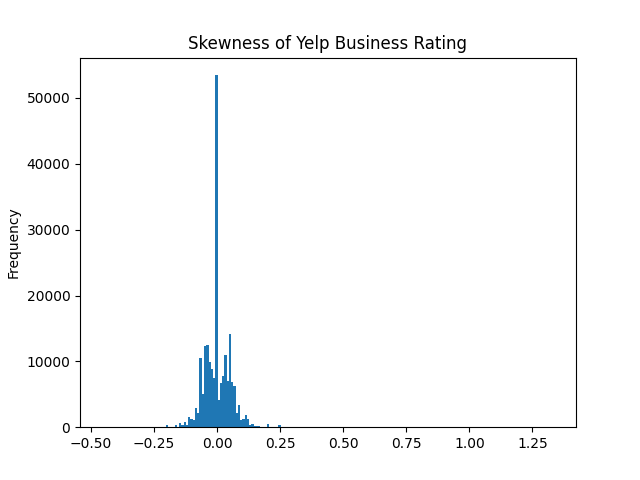

In [235]:
skew_data.select('skew').\
            toPandas()\
            .plot.hist(bins = 200,
                      title = "Skewness of Yelp Business Rating",
                      legend = False)

%matplot plt

##### alternative we can plot with seaborn.distplot()

In [14]:
pdf = skew_data.select('skew').\
            toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [15]:
pdf.head(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

       skew
0 -0.018933
1  0.009042
2 -0.018182
3 -0.025210
4 -0.029508

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

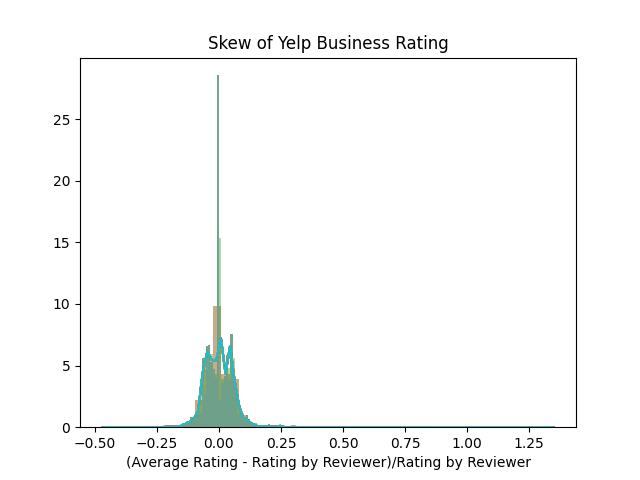

In [60]:
sns.distplot(pdf, bins =200).\
    set(title = "Skew of Yelp Business Rating",
        xlabel = '(Average Rating - Rating by Reviewer)/Rating by Reviewer')

%matplot plt

**The approximation of distribution function resembles a normal shape.**

So, do Yelp (written) Reviews skew negative? Does this analysis actually prove anything? Expound on implications / interpretations of this graph. 

## Intepretation:

**It seems like the peak is at a negative number. It is possible that the Yelp business rating by people who actually wrote review on Yelp is skewed negatively. In other words, a business is likely to get a negative rating than its average rating of all people who give a rating.**

**However, such conclusion should not be drawn by solely considering the graphs above. Thus, will continue with a statistical approach to examine whether the mean(average rating) is different from the mean（rating by users who actually wrote a text review).**  

## Statistical Aproach

#### Before we perform the one sample T test, we should check whether our data is reasonably normally distributed. To do so, let us perform a normality assumption test by using the scipy.stats.shapiro() in Scipy library, which is often called Shapiro-Wilk normality test .

In [58]:
# Shapiro-Wilk normality test 
scipy.stats.shapiro(pdf)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(0.9230055212974548, 0.0)

In [59]:
len(pdf)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

209393

**Note that our p value is very to 0 so we shouldn't perform the T test since the control limit theorem for convergence maybe not be fast enough. However, we will perform the t-test since we have a large amount of data and convergence is based on the amount of data.**



### Let the X be a sample from N(0,sigma).

##### test of equality of means
##### Ho: mean(X) = 0
##### Assumption: xi ~ N(0, sigma) for every observation in X ( assumption is not quite satisified )


In [50]:
# scipy.stats.ttest_1samp(a, popmean, axis=0, nan_policy='propagate')
import scipy.stats
scipy.stats.ttest_1samp(pdf, 0)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Ttest_1sampResult(statistic=array([10.23418099]), pvalue=array([1.41241332e-24]))

**According to the T statistic value given by the T-test, we can conclude that the mean of skew is significantly different from 0 at 5% signficant level. This implies that the mean of rating by user with text review submitted are different from the average rating by all users. In this case, average rating is lower than the other.** 

**Interesting Fact!**

**Variation in Rating given by reviewers is greater than the average rating.**

### test of equality of variance 
### Ho: var(y1) = var(y2) Ha: var(y1) != var(y2)


Under **Ho**, Sy1/Sy2 ~ **F**(df1, df2) with df1 = n1 - 1, df2 = n2 - 1

In [25]:
n1    = business_data.count()

y1mean = (business_data.agg({'stars':'sum'}).toPandas().iloc[0,0])/n1

y1std = (business_data.agg({'stars':'std'}).toPandas().iloc[0,0])

print(f'mean:{y1mean}, std:{y1std}')



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

mean:3.5380552358483808, std:1.0235430346225876

In [26]:
n2    =  review_data.filter(review_data.text.isNotNull()).count()

y2mean = (review_data.filter(review_data.text.isNotNull())\
          .agg({'stars':'sum'}).toPandas().iloc[0,0])/n2

y2std = (review_data.filter(review_data.text.isNotNull()).agg({'stars':'std'}).toPandas().iloc[0,0])

print(f'mean:{y2mean}, std:{y2std}')



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

mean:3.7035746370644906, std:1.4904860263514572

In [27]:
print(f'n1 is {n1}, n2 is {n2}')
print(f'Sy1/Sy2 is :{y1std/y2std}')
print(f'The value of F to be compared is F({n1-1},{n2-1}) at 2.5% and 97.5% quantile')

import scipy.stats
print(f' 2.5% quantile:{scipy.stats.f.ppf(q=0.025, dfn=n1-1, dfd=n2-1)}')
print(f'97.5% quantile:{scipy.stats.f.ppf(q=1-0.025,  dfn=n1-1, dfd=n2-1)}')


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

n1 is 209393, n2 is 8021122
Sy1/Sy2 is :0.6867176320519464
The value of F to be compared is F(209392,8021121) at 2.5% and 97.5% quantile
 2.5% quantile:0.9938738615011921
97.5% quantile:1.0061456752249898

**Since F-statistics are significantly different, we can conclude that the variances of the two ratings are indeed different.**

____________________________________________________________________________________________________

# Should the Elite be Trusted? 

### how accurate or close are the ratings of an "elite" user (check Users table schema) vs the actual business rating.

In [64]:
## just a quick reviews of our data sets
user_data.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['average_stars', 'compliment_cool', 'compliment_cute', 'compliment_funny', 'compliment_hot', 'compliment_list', 'compliment_more', 'compliment_note', 'compliment_photos', 'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool', 'elite', 'fans', 'friends', 'funny', 'name', 'review_count', 'useful', 'user_id', 'yelping_since']

In [65]:
business_data.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['address', 'attributes', 'business_id', 'categories', 'city', 'hours', 'is_open', 'latitude', 'longitude', 'name', 'postal_code', 'review_count', 'stars', 'state']

In [66]:
review_data.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text', 'useful', 'user_id']

In [67]:
user_data.select(['user_id','elite']).show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|             user_id|               elite|
+--------------------+--------------------+
|ntlvfPzc8eglqvk92...|                    |
|FOBRPlBHa3WPHFB5q...|2008,2009,2010,20...|
|zZUnPeh2hEp0WydbA...|                2010|
|QaELAmRcDc5TfJEyl...|                2009|
|xvu8G900tezTzbbfq...|2009,2010,2011,20...|
|z5_82komKV3mI4ASG...|                2007|
|ttumcu6hWshk_EJVW...|                    |
|f4_MRNHvN-yRn7EA8...|2011,2012,2013,20...|
|UYACF30806j2mfbB5...|                    |
|QG13XBbgHWydzThRB...|           2008,2009|
+--------------------+--------------------+
only showing top 10 rows

**date is a string which we should get the year out**

In [68]:
business_data.select(['business_id','stars']).show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|f9NumwFMBDn751xgF...|  3.5|
|Yzvjg0SayhoZgCljU...|  5.0|
|XNoUzKckATkOD1hP6...|  5.0|
|6OAZjbxqM5ol29BuH...|  2.5|
|51M2Kk903DFYI6gnB...|  4.5|
|cKyLV5oWZJ2NudWgq...|  4.5|
|oiAlXZPIFm2nBCt0D...|  3.5|
|ScYkbYNkDgCneBrD9...|  5.0|
|pQeaRpvuhoEqudo3u...|  4.5|
|EosRKXIGeSWFYWwpk...|  3.0|
+--------------------+-----+
only showing top 10 rows

In [69]:
review_data.select(['business_id','date','stars','user_id']).show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------------+-----+--------------------+
|         business_id|               date|stars|             user_id|
+--------------------+-------------------+-----+--------------------+
|-MhfebM0QIsKt87iD...|2015-04-15 05:21:16|  2.0|OwjRMXRC0KyPrIlcj...|
|lbrU8StCq3yDfr-QM...|2013-12-07 03:16:52|  1.0|nIJD_7ZXHq-FX8byP...|
|HQl28KMwrEKHqhFrr...|2015-12-05 03:18:11|  5.0|V34qejxNsCbcgD8C0...|
|5JxlZaqCnk1MnbgRi...|2011-05-27 05:30:52|  1.0|ofKDkJKXSKZXu5xJN...|
|IS4cv902ykd8wj1TR...|2017-01-14 21:56:57|  4.0|UgMW8bLE0QMJDCkQ1...|
+--------------------+-------------------+-----+--------------------+
only showing top 5 rows

##### get the year out from date

In [70]:
from pyspark.sql.functions import substring

review = review_data.select(
                   review_data.business_id,
                   review_data.user_id,
                   review_data.stars.alias('elite_rating'),
                   substring(review_data.date, 0,4).alias('Year')
                  )

review.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+------------+----+
|         business_id|             user_id|elite_rating|Year|
+--------------------+--------------------+------------+----+
|-MhfebM0QIsKt87iD...|OwjRMXRC0KyPrIlcj...|         2.0|2015|
|lbrU8StCq3yDfr-QM...|nIJD_7ZXHq-FX8byP...|         1.0|2013|
|HQl28KMwrEKHqhFrr...|V34qejxNsCbcgD8C0...|         5.0|2015|
|5JxlZaqCnk1MnbgRi...|ofKDkJKXSKZXu5xJN...|         1.0|2011|
|IS4cv902ykd8wj1TR...|UgMW8bLE0QMJDCkQ1...|         4.0|2017|
+--------------------+--------------------+------------+----+
only showing top 5 rows

### Overview of our procedures to answer the question about whether the elite should be trusted
_____________________________________________________________________________________________

#### joinning tables
 we should join the **review** with **user_data** (filtered by the expanded elite) and then join **business_data** .
 
 technically take join(**review** with **user_data** filtered by elite) 
 and left.join(**business_data** ).
 take everything from **business_data** , select the stars as overall_stars, select stars given by the elite.
 
create a **difference** column from overall_stars - stars. and plot **difference** with a histogram plot or bar plot

#### statistical analysis: 
Ho: mean(difference)  = 0
Ha: mean(difference) != 0

Z = (mean(difference) - 0)/ std(difference)/len(difference) ~ approximately N(0,1)

**reject Ho if Z >> 1.96 at 5% significant level**


In [71]:
from pyspark.sql.functions import explode,split

elite_user = user_data.select(user_data.user_id, explode(split(user_data.elite, ','))\
                        .alias('Year'))
                

elite_user.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----+
|             user_id|Year|
+--------------------+----+
|ntlvfPzc8eglqvk92...|    |
|FOBRPlBHa3WPHFB5q...|2008|
|FOBRPlBHa3WPHFB5q...|2009|
|FOBRPlBHa3WPHFB5q...|2010|
|FOBRPlBHa3WPHFB5q...|2011|
|FOBRPlBHa3WPHFB5q...|2012|
|FOBRPlBHa3WPHFB5q...|2013|
|zZUnPeh2hEp0WydbA...|2010|
|QaELAmRcDc5TfJEyl...|2009|
|xvu8G900tezTzbbfq...|2009|
+--------------------+----+
only showing top 10 rows

In [73]:
## joining the review and user data
elite_review = elite_user.join(review, on = ['user_id','Year'], how = 'inner')
elite_review.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----+--------------------+------------+
|             user_id|Year|         business_id|elite_rating|
+--------------------+----+--------------------+------------+
|-5uvOHRkvijt1vzSX...|2017|YWs-ZFQier0rFv1qa...|         4.0|
|-5uvOHRkvijt1vzSX...|2017|IbOrNwCdMTd-eicZ9...|         3.0|
|-5uvOHRkvijt1vzSX...|2017|4vHm-szf4WUn77MbJ...|         3.0|
|-5uvOHRkvijt1vzSX...|2017|Lyzr1uckXL0U-iBoM...|         2.0|
|-5uvOHRkvijt1vzSX...|2017|zBrm-ejSU0QwDlpFy...|         4.0|
|-6gYApoyPvez737nx...|2018|QXV3L_QFGj8r6nWX2...|         4.0|
|-6gYApoyPvez737nx...|2018|0d0i0FaJq1GIeW1rS...|         4.0|
|-6gYApoyPvez737nx...|2018|XQETjKH84gxDrAiz2...|         4.0|
|-6gYApoyPvez737nx...|2018|qFAw6wHMMcr4ctF-Z...|         4.0|
|-6gYApoyPvez737nx...|2018|77h11eWv6HKJAgojL...|         4.0|
+--------------------+----+--------------------+------------+
only showing top 10 rows

In [74]:
### further joining. matching the above with business_data by id 
rating_data = elite_review.join(business_data, 
                  on = ['business_id'], 
                  how = 'inner')
rating_data.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['business_id', 'user_id', 'Year', 'elite_rating', 'address', 'attributes', 'categories', 'city', 'hours', 'is_open', 'latitude', 'longitude', 'name', 'postal_code', 'review_count', 'stars', 'state']

In [75]:
rating_data.select(['business_id','stars','elite_rating']).show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+------------+
|         business_id|stars|elite_rating|
+--------------------+-----+------------+
|YWs-ZFQier0rFv1qa...|  4.0|         4.0|
|Lyzr1uckXL0U-iBoM...|  2.5|         2.0|
|IbOrNwCdMTd-eicZ9...|  2.5|         3.0|
|zBrm-ejSU0QwDlpFy...|  3.5|         4.0|
|4vHm-szf4WUn77MbJ...|  3.0|         3.0|
+--------------------+-----+------------+
only showing top 5 rows

**we can make a the difference vector**

In [76]:
## the difference vector in the dataframe

from pyspark.sql.functions import mean,stddev

diff_table = rating_data.withColumn('diff',rating_data['stars'] - rating_data['elite_rating'])

n_x = diff_table.count()

diff_table.agg(mean(diff_table.diff)).show()
diff_table.agg(stddev(diff_table.diff)).show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+
|           avg(diff)|
+--------------------+
|-0.11894873608892242|
+--------------------+

+------------------+
| stddev_samp(diff)|
+------------------+
|0.9890418731601378|
+------------------+

In [79]:
## sample mean
mean_x =  diff_table.agg(mean(diff_table.diff).alias('mean')).toPandas()
mean_x = float(mean_x['mean'])
#  sample standard deviation
std_x = diff_table.agg(stddev(diff_table.diff).alias('std')).toPandas()
std_x = float(std_x['std'])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [80]:
import scipy.stats
print(f'The sample mean is {round(mean_x,3)}, standard deviation is {round(std_x,3)},and T-score is { round( mean_x/(std_x/(n_x**0.5) ),3)}')
print(f'Reject Ho if |T-score| is greater than {round(scipy.stats.t.ppf(0.975, n_x - 1),3)}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

The sample mean is -0.119, standard deviation is 0.989,and T-score is -134.665
Reject Ho if |T-score| is greater than 1.96

In [81]:
## size of the difference vector
n_x

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1253767

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

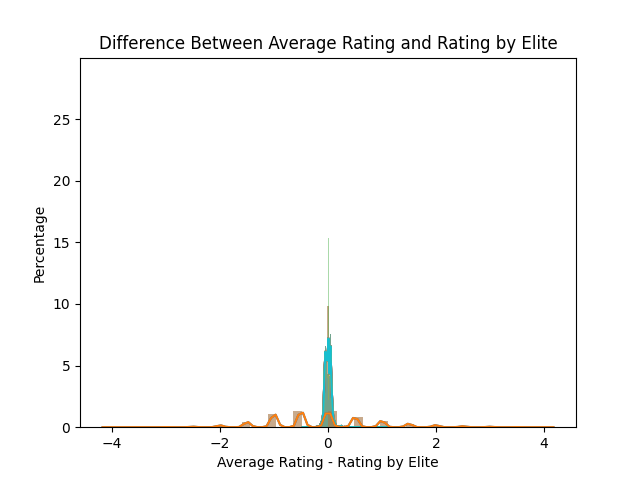

In [83]:
x = diff_table.select('diff').toPandas()

import seaborn as sn
sn.distplot(x).\
    set(title = "Difference Between Average Rating and Rating by Elite",
        xlabel = 'Average Rating - Rating by Elite', ylabel = 'Percentage')
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

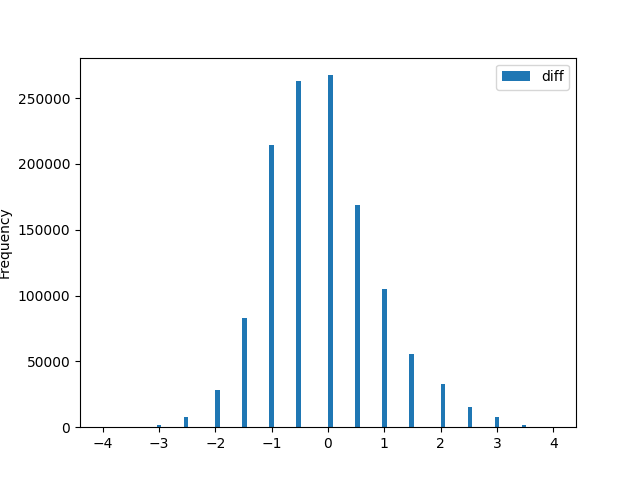

In [85]:
x.plot.hist(bins = 100)
%matplot plt

***As show in the graph above, the difference between ratings seems to be on the negative side. In other words, the elites tend to have a higher rating than the average rating by all users.***

***Through the use of hypothesis testing of the mean the difference between rating, we know that the difference between ratings is significantly different from zero. This is in accordance with our graphs above, showing a skewness on the distribution of the difference.***
